In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math

In [3]:
df=pd.read_csv("C:/Users/VIMAL P/Downloads/CarPrice_Assignment.csv")

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop('car_ID',axis=1,inplace=True)

In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

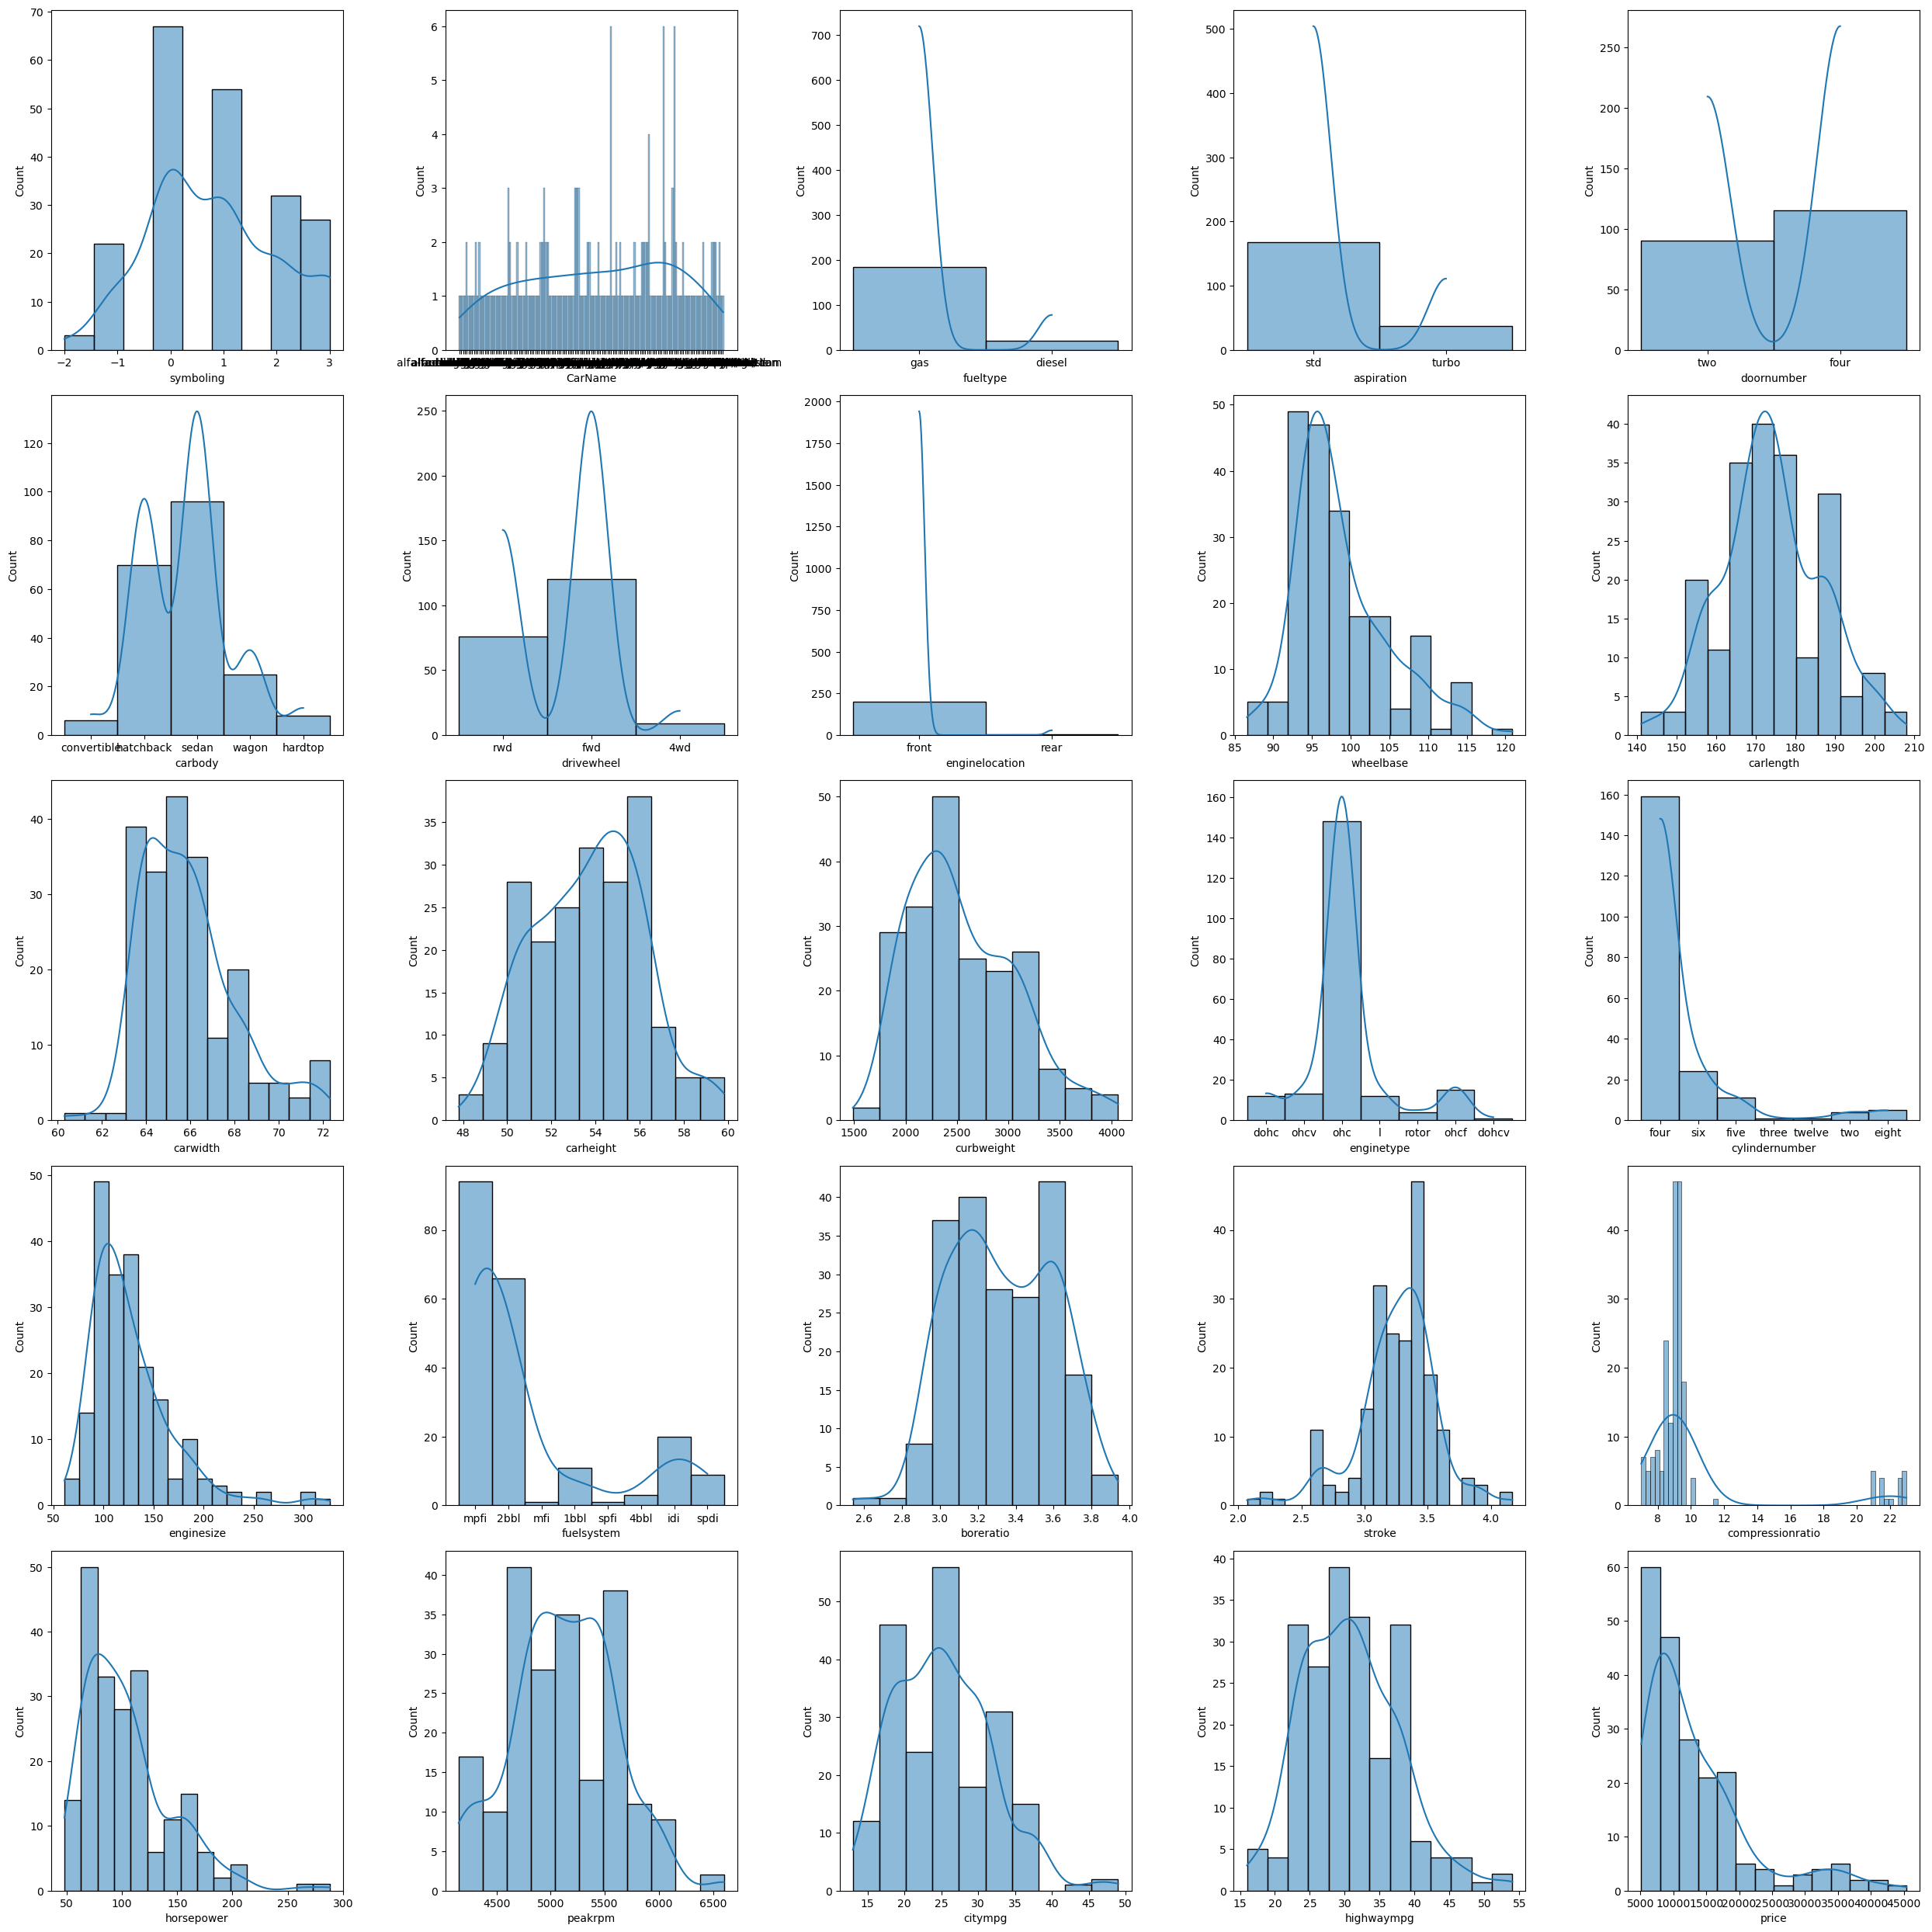

In [17]:
plt.figure(figsize=(25,25))
plotnumber=1 # initialization of plotnumber
for i in df: # using for loop
    plt.subplot(5,5,plotnumber)
    sns.histplot(x=df[i],kde=True) # plotting histogram 
    plotnumber+=1 # increamentation
plt.tight_layout() 

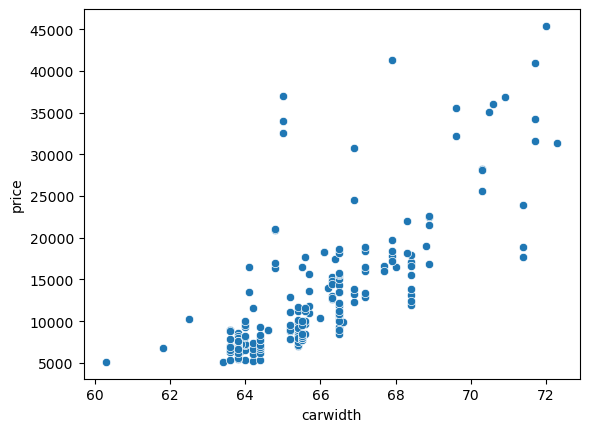

In [18]:
sns.scatterplot(x=df.carwidth,y=df.price) # using scatterplot to display relation between carwidth and price
plt.show()

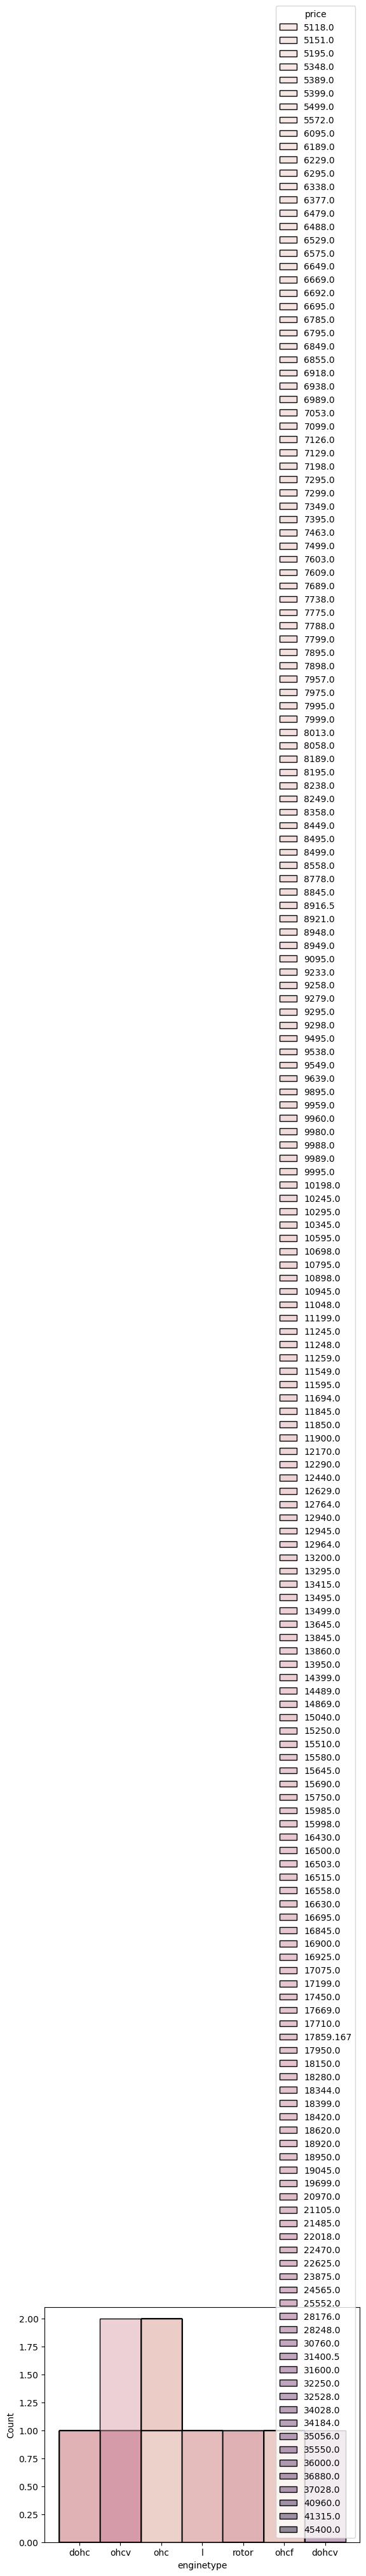

In [20]:
sns.histplot(x=df.enginetype,hue=df.price)
plt.show()

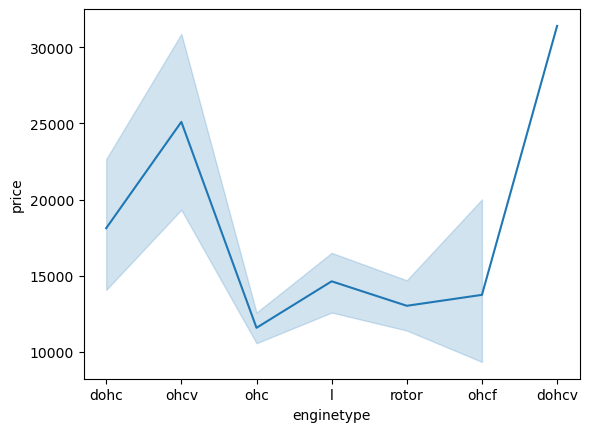

In [22]:
sns.lineplot(x=df.enginetype,y=df.price)
plt.show()

In [23]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [24]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [26]:
lb=LabelEncoder()
for column in df.columns: # using for loop
    if df[column].dtype=="object":
        df[column]=lb.fit_transform(df[column])

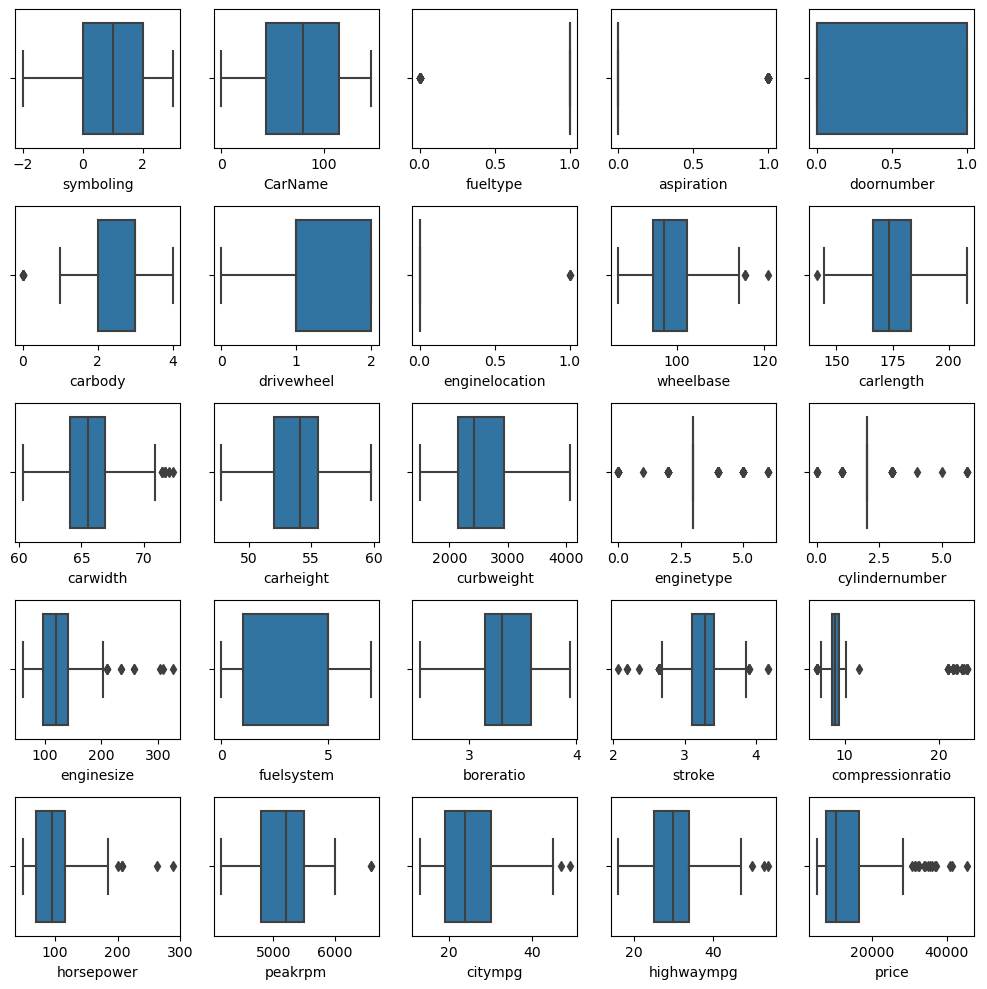

In [28]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1

for column in df:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x = df[column])
        plotnumber+=1
plt.tight_layout()

In [30]:
# handling outliers manually
df.loc[df.carbody<1,"carbody"]=np.median(df.carbody)
df.loc[df.enginesize>200,"enginesize"]=np.median(df.enginesize)
df.loc[df.compressionratio>11,"compressionratio"]=np.median(df.compressionratio)
df.loc[df.horsepower>200,"horsepower"]=np.median(df.horsepower)

In [31]:
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,3,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,3,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.507184,-0.041671,0.212471,-0.531954,-0.357612,...,-0.059513,0.091163,-0.130051,-0.008735,0.043782,0.010813,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.082758,-0.016129,0.055968,0.014550,0.053016,...,0.041144,0.123845,0.188598,-0.181775,0.150478,-0.129367,-0.138309,0.093437,0.102895,-0.231439
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.134267,-0.132257,0.040070,-0.308346,-0.212679,...,-0.187359,0.041529,-0.054451,-0.241829,-0.072367,0.160936,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.017576,0.066465,-0.057191,0.257611,0.234539,...,0.280748,0.288086,0.212614,0.222982,-0.519807,0.334712,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.663945,0.098954,0.137757,-0.447357,-0.398568,...,-0.047916,0.015519,-0.119258,0.011082,0.026246,0.035192,0.247668,0.012417,0.036330,-0.031835
carbody,-0.507184,0.082758,-0.134267,0.017576,-0.663945,1.000000,-0.073161,-0.173227,0.350542,0.357428,...,0.008278,0.028244,0.084618,-0.099715,-0.032618,-0.027580,-0.120538,-0.049863,-0.091773,0.031481
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.073161,1.000000,0.147865,0.459745,0.485649,...,0.480503,0.424686,0.481827,0.071591,0.052774,0.491561,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.173227,0.147865,1.000000,-0.187790,-0.050989,...,0.326036,0.105971,0.185042,-0.138455,0.123696,-0.020976,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.350542,0.459745,-0.187790,1.000000,0.874587,...,0.423360,0.384601,0.488750,0.160959,-0.230926,0.483643,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.357428,0.485649,-0.050989,0.874587,1.000000,...,0.582145,0.557810,0.606454,0.129533,-0.261606,0.637429,-0.287242,-0.670909,-0.704662,0.682920


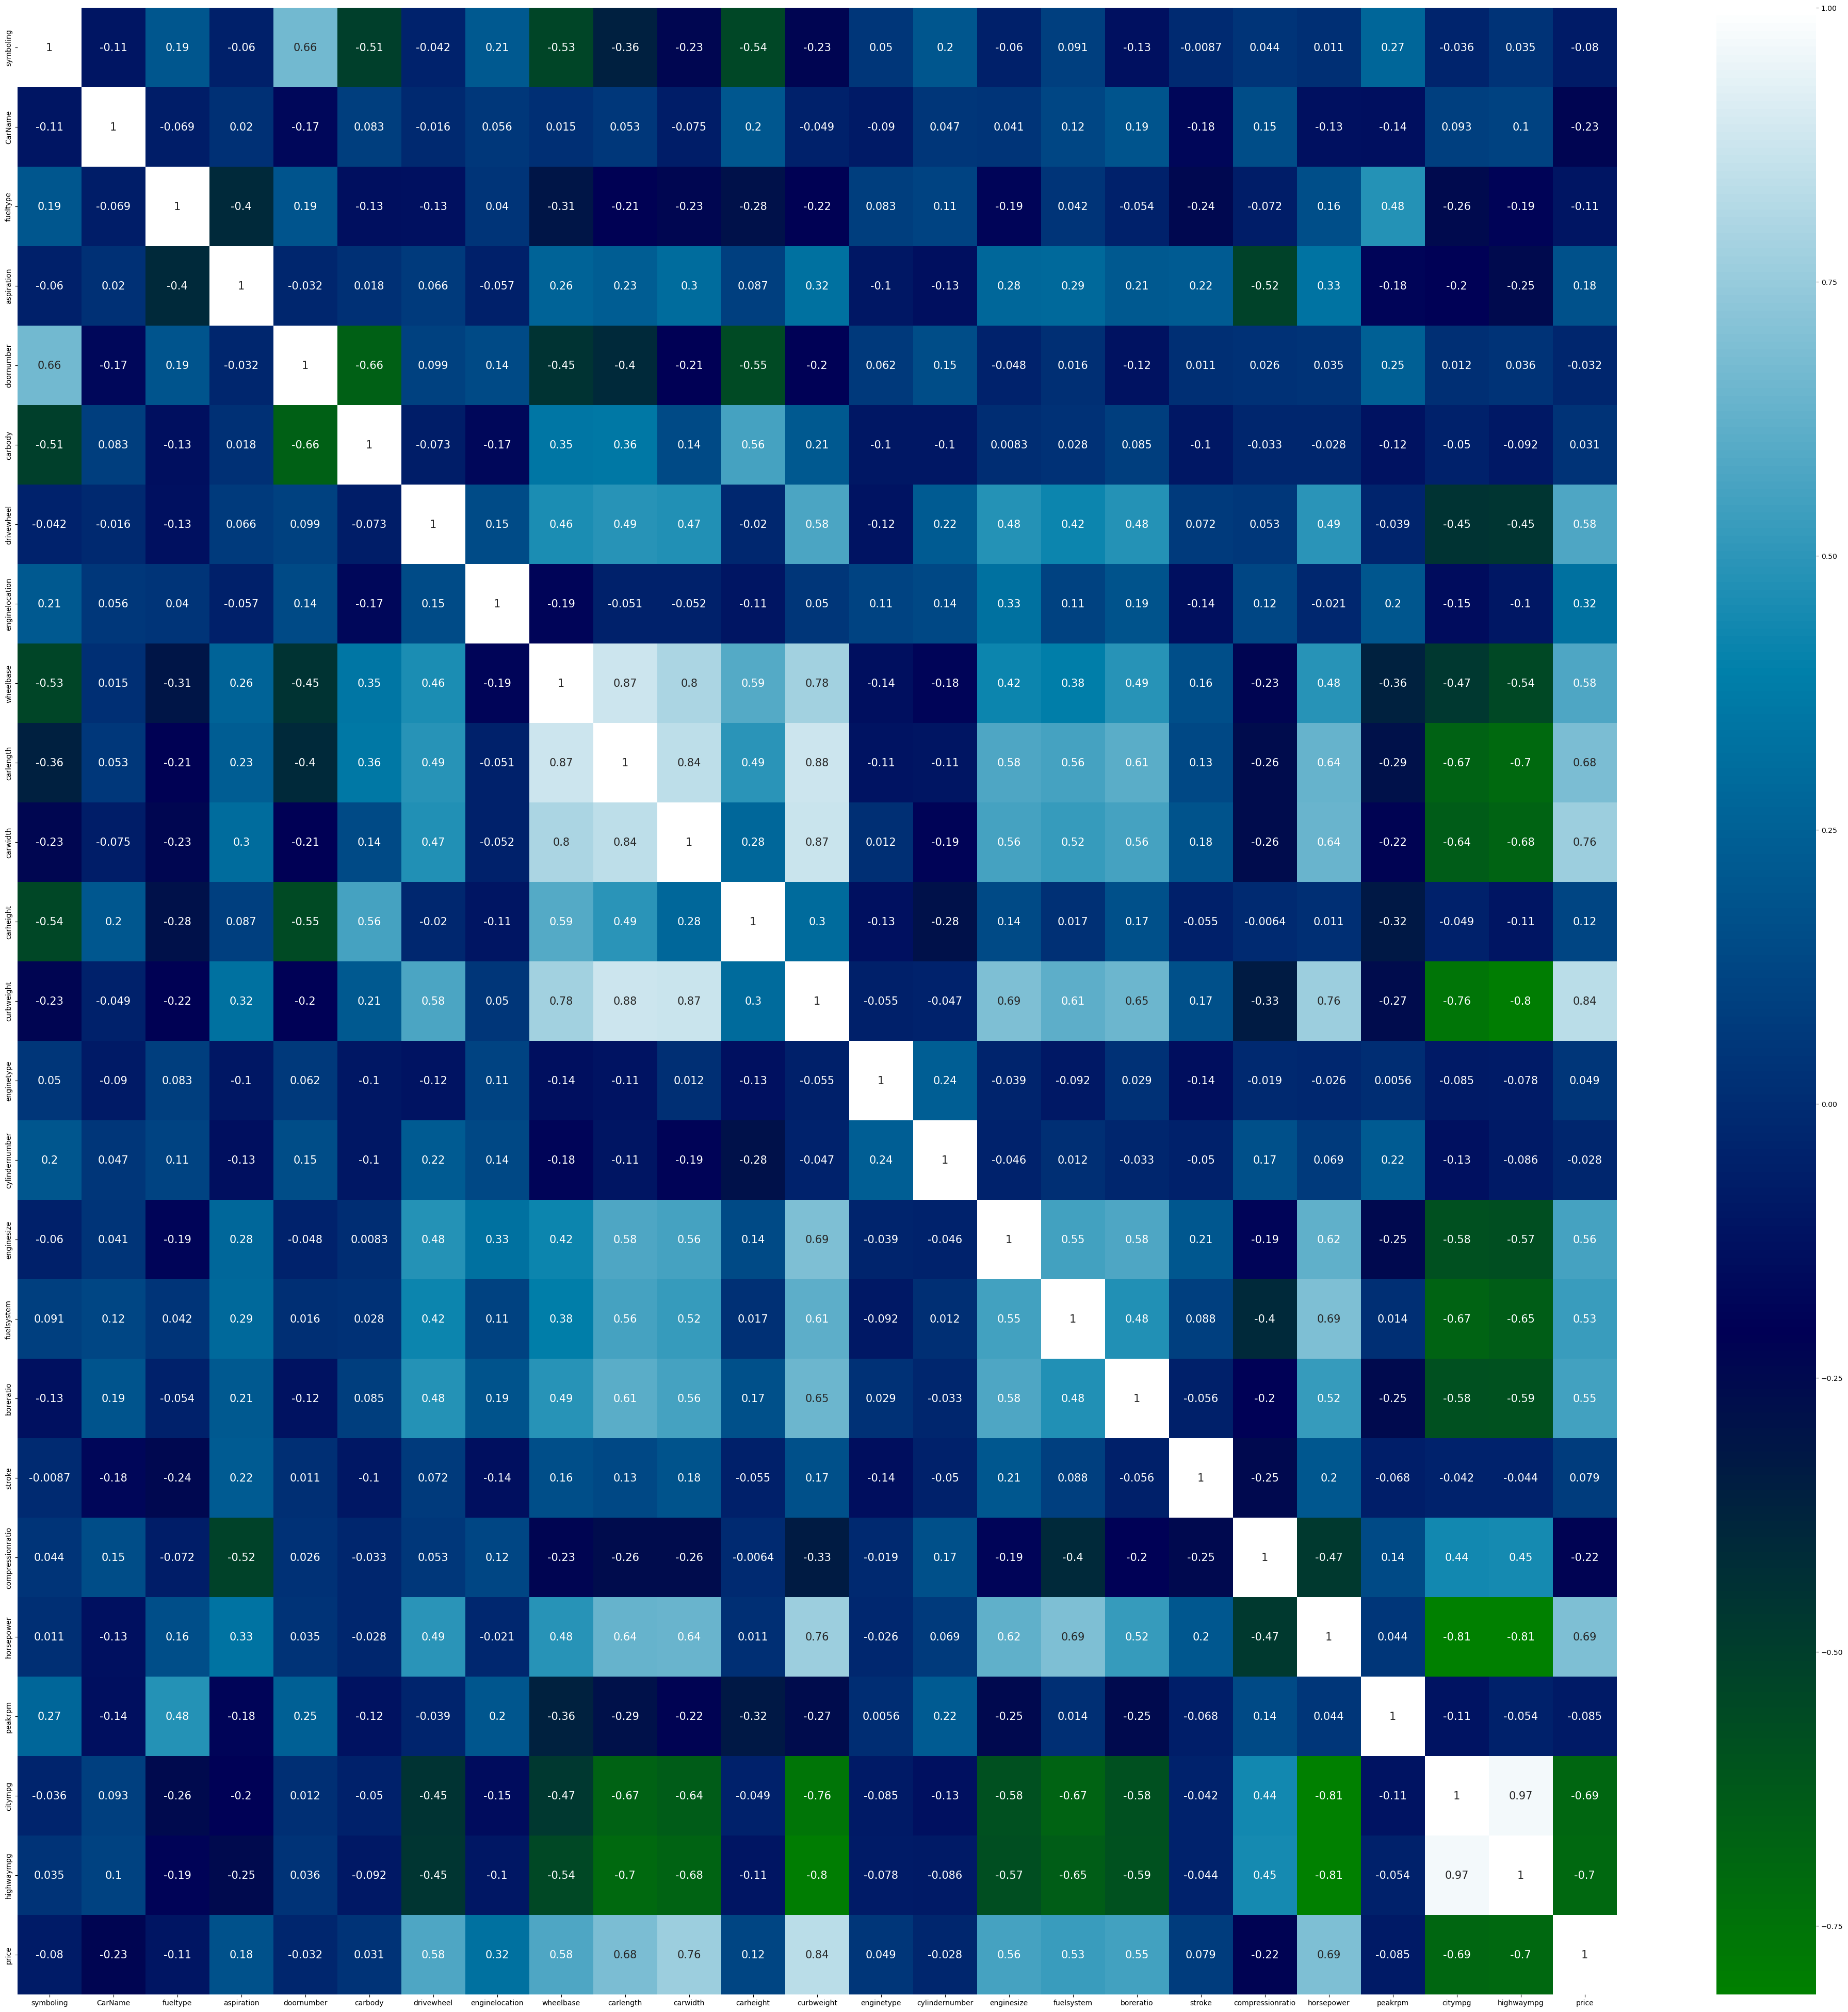

In [35]:
# using heatmap to visualize correlated columns
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap="ocean", annot_kws={"size":15})
plt.show()

In [37]:
# using threshold method to get highly correlated features
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [39]:
corr_features=correlation(df,0.9)
len(set(corr_features))

1

In [40]:
corr_features # column which is highly correlated

{'highwaympg'}

In [42]:
# dropping highly correlated column
df.drop("highwaympg",axis=1,inplace=True)

In [44]:
x=df.drop("price",axis=1)
y=df[["price"]]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [47]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [52]:
# calculating score of performance metrics
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=math.sqrt(mean_squared_error(y_test, y_pred))
r2score=r2_score(y_test, y_pred)

In [53]:
print("metrics on test data \n")
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("r2score:",r2score)

metrics on test data 

mse: 8481137.92877216
mae: 2140.5050785736057
rmse: 2912.239332330391
r2score: 0.8775894639056243


In [54]:
adj_r2score = 1-(1-0.8775894639056243)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447
